<a href="https://colab.research.google.com/github/Om-Tiwari/University-Admission-Analysis-and-Prediction/blob/main/University_Admission_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
import pandas as pd
df = pd.read_csv('Admission_Predict.csv')
print(df.head())  # Check the first 5 rows of data

   GRE  TOEFL  University_Rating  SOP  LOR  CGPA  Research  Chance_of_Admit
0  337    118                  4  4.5  4.5  9.65         1             0.92
1  324    107                  4  4.0  4.5  8.87         1             0.76
2  316    104                  3  3.0  3.5  8.00         1             0.72
3  322    110                  3  3.5  2.5  8.67         1             0.80
4  314    103                  2  2.0  3.0  8.21         0             0.65


In [ ]:
# Perform EDA
print(df.head())  # Check the first few rows of data

   GRE  TOEFL  University_Rating  SOP  LOR  CGPA  Research  Chance_of_Admit
0  337    118                  4  4.5  4.5  9.65         1             0.92
1  324    107                  4  4.0  4.5  8.87         1             0.76
2  316    104                  3  3.0  3.5  8.00         1             0.72
3  322    110                  3  3.5  2.5  8.67         1             0.80
4  314    103                  2  2.0  3.0  8.21         0             0.65


In [ ]:
print(df.info())  # Check the data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE                500 non-null    int64  
 1   TOEFL              500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance_of_Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB
None


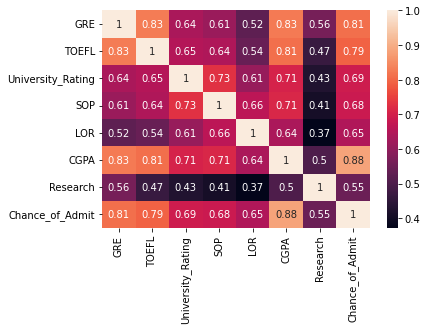

In [ ]:
# Examine the correlation between variables
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()


In [ ]:
print(df.describe())  # Check the statistical summary of data

              GRE       TOEFL  University_Rating         SOP        LOR  \
count  500.000000  500.000000         500.000000  500.000000  500.00000   
mean   316.472000  107.192000           3.114000    3.374000    3.48400   
std     11.295148    6.081868           1.143512    0.991004    0.92545   
min    290.000000   92.000000           1.000000    1.000000    1.00000   
25%    308.000000  103.000000           2.000000    2.500000    3.00000   
50%    317.000000  107.000000           3.000000    3.500000    3.50000   
75%    325.000000  112.000000           4.000000    4.000000    4.00000   
max    340.000000  120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance_of_Admit  
count  500.000000  500.000000        500.00000  
mean     8.576440    0.560000          0.72174  
std      0.604813    0.496884          0.14114  
min      6.800000    0.000000          0.34000  
25%      8.127500    0.000000          0.63000  
50%      8.560000    1.000000 

In [ ]:
print(df.corr())  # Check the correlation between the features

                        GRE     TOEFL  University_Rating       SOP       LOR  \
GRE                1.000000  0.827200           0.635376  0.613498  0.524679   
TOEFL              0.827200  1.000000           0.649799  0.644410  0.541563   
University_Rating  0.635376  0.649799           1.000000  0.728024  0.608651   
SOP                0.613498  0.644410           0.728024  1.000000  0.663707   
LOR                0.524679  0.541563           0.608651  0.663707  1.000000   
CGPA               0.825878  0.810574           0.705254  0.712154  0.637469   
Research           0.563398  0.467012           0.427047  0.408116  0.372526   
Chance_of_Admit    0.810351  0.792228           0.690132  0.684137  0.645365   

                       CGPA  Research  Chance_of_Admit  
GRE                0.825878  0.563398         0.810351  
TOEFL              0.810574  0.467012         0.792228  
University_Rating  0.705254  0.427047         0.690132  
SOP                0.712154  0.408116         0.684

array([[<AxesSubplot:title={'center':'GRE'}>,
        <AxesSubplot:title={'center':'TOEFL'}>,
        <AxesSubplot:title={'center':'University_Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR'}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance_of_Admit'}>, <AxesSubplot:>]],
      dtype=object)

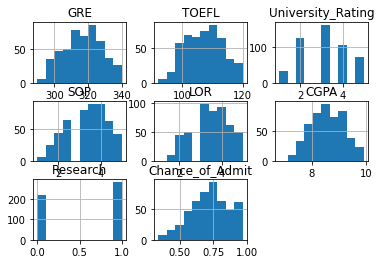

In [ ]:
df.hist()  # Check the distribution of data

In [ ]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split the data into training and testing sets
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model's performance
from math import sqrt
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 0.0031625332027981263
Root Mean Squared Error: 0.05623640460411855
Mean Absolute Error: 0.03929434900600775
R-squared: 0.8450270396041493


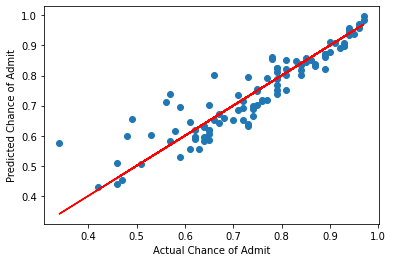

In [ ]:
# Visualize the results
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Chance of Admit')
plt.ylabel('Predicted Chance of Admit')
plt.show()